<a href="https://colab.research.google.com/github/Aadhi7310/EV_sales/blob/main/EV_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('EV_data.xlsx')
data.head()

,Year,Month_name,State,Vehicle Class,Vehicle Category,Vehicle Type,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,...,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total,Total EV
0,2024,jan,Goa,ADAPTED VEHICLE,Others,Others,0,0,0,0,...,0,3,0,0,0,0,0,0,3,0
1,2024,jan,Goa,AGRICULTURAL TRACTOR,Others,Others,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2024,jan,Goa,AMBULANCE,Others,Others,0,3,0,0,...,0,1,0,0,0,0,0,0,4,0
3,2024,jan,Goa,BUS,Bus,Bus,0,33,0,0,...,0,0,0,0,0,0,0,0,43,10
4,2024,jan,Goa,CASH VAN,Others,Others,0,3,0,0,...,0,0,0,0,0,0,0,0,3,0


In [ ]:
data.shape

(49399, 29)

In [ ]:
sum_of_cols = data.loc[:, 'CNG ONLY':'SOLAR'].sum()
sum_of_cols

CNG ONLY                 992738
DIESEL                 12042956
DIESEL/HYBRID             42479
DI-METHYL ETHER               0
DUAL DIESEL/BIO CNG           0
DUAL DIESEL/CNG              25
DUAL DIESEL/LNG               1
ELECTRIC(BOV)           3316085
ETHANOL                      15
FUEL CELL HYDROGEN            1
LNG                         276
LPG ONLY                  70967
METHANOL                      6
NOT APPLICABLE           357060
PETROL                 89002291
PETROL/CNG              1865315
PETROL/ETHANOL           435800
PETROL/HYBRID            827360
PETROL/LPG               178456
PETROL/METHANOL               0
SOLAR                         2
dtype: int64

Here only Electric(BOV), Fuel cell hydrogen and solar belongs to electric velicle categogy

The cleaned data set is again uploaded only consisting of the total number of EV sales and total sales


In [ ]:
datas = pd.read_excel('EV_cleaned.xlsx')
datas.head()

,Year,Month_name,State,Vehicle Type,Total sales,EV sales,EV share
0,2024.0,jan,Goa,Others,3.0,0.0,0.000000
1,2024.0,jan,Goa,Others,1.0,0.0,0.000000
2,2024.0,jan,Goa,Others,4.0,0.0,0.000000
3,2024.0,jan,Goa,Bus,43.0,10.0,23.255814
4,2024.0,jan,Goa,Others,3.0,0.0,0.000000


In [ ]:
yearly_sales = datas.groupby('Year')['Total sales'].sum()
EV_salesyr = datas.groupby('Year')['EV sales'].sum()
print(yearly_sales)
print(EV_salesyr)

Year
2019.0    24122801.0
2020.0    18606887.0
2021.0    18885481.0
2022.0    21552164.0
2023.0    23836628.0
2024.0     2127872.0
Name: Total sales, dtype: float64
Year
2019.0     166820.0
2020.0     124684.0
2021.0     331499.0
2022.0    1024723.0
2023.0    1525180.0
2024.0     143182.0
Name: EV sales, dtype: float64


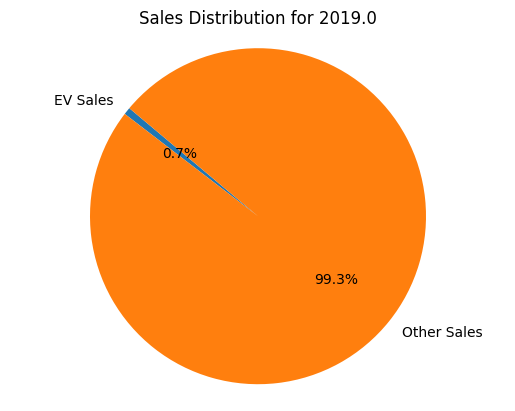

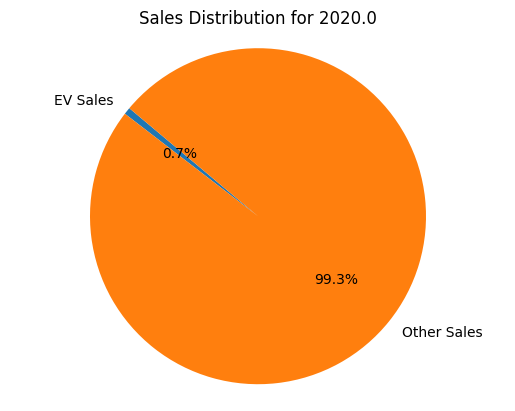

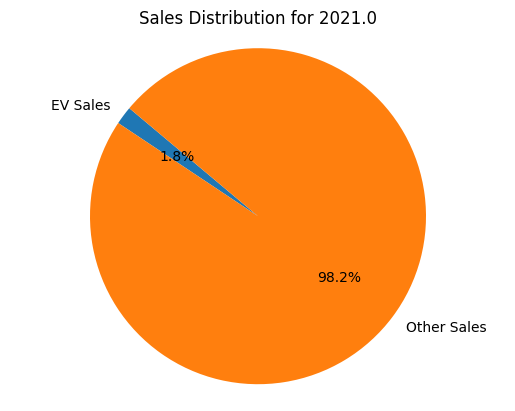

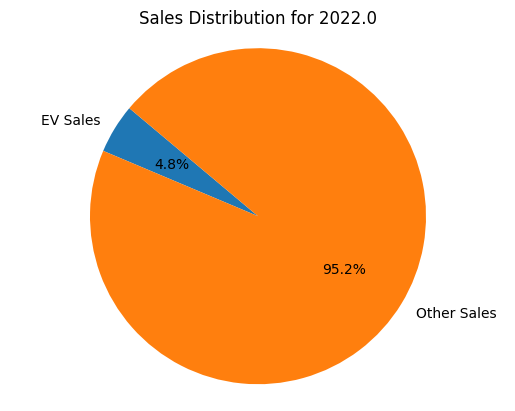

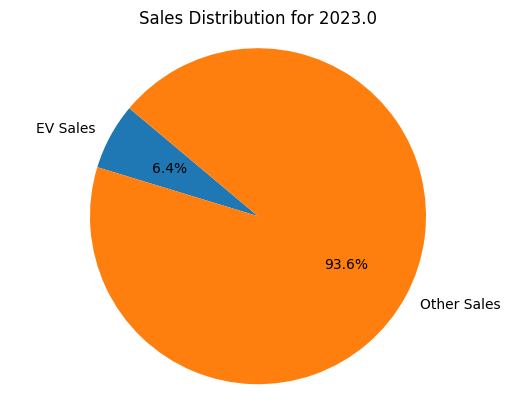

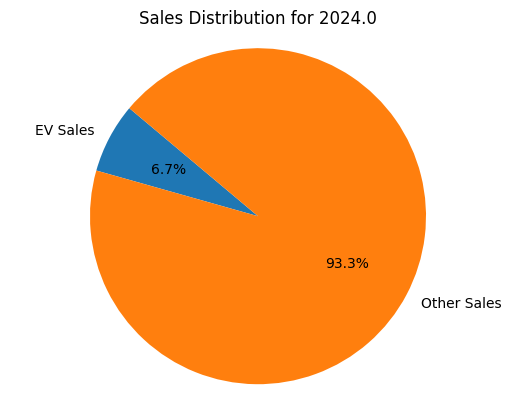

In [ ]:
for year in yearly_sales.index:
    plt.figure()
    Other_sales = yearly_sales[year] - EV_salesyr[year]
    plt.pie([EV_salesyr[year],Other_sales], labels=['EV Sales', 'Other Sales'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Sales Distribution for {year}')
    plt.axis('equal')
    plt.show()

We can see that the sale of EV vehicle have seen an increase in the market share over the years and it is continously growing

In [ ]:
datas.groupby('Vehicle Type')['Total sales'].sum()


Vehicle Type
2W_Personal           80827235.0
2W_Shared                69877.0
3W_Goods                460385.0
3W_Goods_LowSpeed        86676.0
3W_Personal               4044.0
3W_Shared              1694923.0
3W_Shared_LowSpeed     1169695.0
4W_Personal           15350879.0
4W_Shared               639495.0
Bus                     230904.0
Institution Bus          64561.0
Others                 8533159.0
Name: Total sales, dtype: float64

In [ ]:
datas.groupby('Vehicle Type')['EV sales'].sum()

Vehicle Type
2W_Personal           1773434.0
2W_Shared               11498.0
3W_Goods                44654.0
3W_Goods_LowSpeed       86576.0
3W_Personal               353.0
3W_Shared               73349.0
3W_Shared_LowSpeed    1168593.0
4W_Personal            127052.0
4W_Shared               18076.0
Bus                      6931.0
Institution Bus             0.0
Others                   5572.0
Name: EV sales, dtype: float64

In [ ]:
print(datas)

           Year Month_name State Vehicle Type  Total sales  EV sales  \
0        2024.0        jan   Goa       Others          3.0       0.0   
1        2024.0        jan   Goa       Others          1.0       0.0   
2        2024.0        jan   Goa       Others          4.0       0.0   
3        2024.0        jan   Goa          Bus         43.0      10.0   
4        2024.0        jan   Goa       Others          3.0       0.0   
...         ...        ...   ...          ...          ...       ...   
1048570     NaN        NaN   NaN          NaN          NaN       NaN   
1048571     NaN        NaN   NaN          NaN          NaN       NaN   
1048572     NaN        NaN   NaN          NaN          NaN       NaN   
1048573     NaN        NaN   NaN          NaN          NaN       NaN   
1048574     NaN        NaN   NaN          NaN          NaN       NaN   

          EV share  
0         0.000000  
1         0.000000  
2         0.000000  
3        23.255814  
4         0.000000  
...      

In [ ]:
EVsales_datas = pd.read_excel('EV_final.xlsx')
EVsales_datas.head()

,State,Vehicle type,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,...,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00
0,Andhra Pradesh,2W,0.000881,0.000673,0.000997,0.000673,0.000000,0.000866,0.000642,0.000963,...,0.064735,0.073159,0.080117,0.022009,0.026751,0.027802,0.026182,0.026559,0.025200,0.038970
1,Andhra Pradesh,3W,0.010840,0.011691,0.007271,0.294118,0.000000,0.010654,0.120079,0.183206,...,0.048743,0.028743,0.027950,0.025735,0.084577,0.331770,0.127451,0.113354,0.114919,0.135823
2,Andhra Pradesh,4W,0.000126,0.000000,0.000311,0.000000,0.001667,0.001780,0.000492,0.000497,...,0.022282,0.031125,0.026683,0.023597,0.023021,0.014060,0.008376,0.008782,0.011922,0.018169
3,Andhra Pradesh,Bus,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.055556,0.016949,0.126050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Andhra Pradesh,Others,0.000000,0.000320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008235,0.021876,0.005103,0.000287,0.001739,0.000618,0.001065,0.000000,0.000312,0.000372


In [ ]:
EV_share = EVsales_datas.iloc[:,2:50]
print(EV_share)

     2020-01-01  2020-02-01  2020-03-01  2020-04-01  2020-05-01  2020-06-01  \
0      0.000881    0.000673    0.000997    0.000673    0.000000    0.000866   
1      0.010840    0.011691    0.007271    0.294118    0.000000    0.010654   
2      0.000126    0.000000    0.000311    0.000000    0.001667    0.001780   
3      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
4      0.000000    0.000320    0.000000    0.000000    0.000000    0.000000   
..          ...         ...         ...         ...         ...         ...   
135    0.000203    0.000075    0.000085    0.000056    0.000000    0.000119   
136    0.462582    0.506157    0.467733    0.489474    0.869048    0.688699   
137    0.000259    0.000396    0.001869    0.000000    0.025641    0.001294   
138    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
139    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   

     2020-07-01  2020-08-01  2020-09-01  2020-10-01

In [ ]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
EV_share = EV_share.fillna(0)

In [ ]:
pca = PCA()
fast_pca = pca.fit_transform(EV_share)
var = pca.explained_variance_ratio_
cum_var = np.cumsum(var)
summary = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': var,
    'Cumulative Proportion': cum_var
})
print(summary.round(4))

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0               1.2004                  0.8635                 0.8635
1               0.2316                  0.0321                 0.8956
2               0.1893                  0.0215                 0.9171
3               0.1680                  0.0169                 0.9340
4               0.1426                  0.0122                 0.9462
5               0.1272                  0.0097                 0.9559
6               0.1078                  0.0070                 0.9629
7               0.0954                  0.0055                 0.9683
8               0.0922                  0.0051                 0.9734
9               0.0880                  0.0046                 0.9781
10              0.0785                  0.0037                 0.9817
11              0.0701                  0.0029                 0.9847
12              0.0607                  0.0022                 0.9869
13              0.05

In [ ]:
rot = pca.components_
print(rot)

[[ 0.098318    0.09272865  0.06629636 ...  0.18188538  0.17970516
   0.18545698]
 [-0.14604636 -0.21321815 -0.19300605 ...  0.13443229  0.13892047
   0.22046768]
 [-0.15238387 -0.23592269 -0.18710629 ... -0.16159108 -0.15670503
  -0.15500722]
 ...
 [ 0.05067174  0.23731257 -0.1358953  ...  0.01055521  0.01948878
  -0.01503194]
 [-0.16195441 -0.06739926  0.01397694 ...  0.04825521  0.06130087
  -0.03156104]
 [-0.00663209  0.5023977  -0.48776182 ...  0.01271681 -0.07924345
   0.04378707]]


In [ ]:
scaler = StandardScaler()
EV_scaled = scaler.fit_transform(EV_share)
scores = pca.transform(EV_scaled)
print(scores)

[[-2.13336412e+00  1.29791996e-01  2.37877641e-01 ...  1.80560601e-02
   5.98228877e-04  2.20215620e-03]
 [-1.17323751e+00 -1.35482695e-01 -1.27377776e+00 ... -2.35773926e-01
   5.51552111e-02 -4.24775724e-02]
 [-2.20052876e+00 -6.67889412e-01  4.23456755e-01 ...  3.46704688e-02
   3.76153906e-02  2.47973626e-02]
 ...
 [-2.92955693e+00  2.30406876e-01 -6.03448441e-02 ...  3.08116582e-02
   1.74323157e-02  5.21554099e-03]
 [-3.23932861e+00  8.84129061e-02 -2.39614253e-02 ...  1.06914359e-01
   2.65205022e-02  2.65779684e-02]
 [-3.28157804e+00  8.25186490e-02 -3.43565504e-02 ...  4.04042585e-02
   2.06280833e-02  1.84777462e-02]]


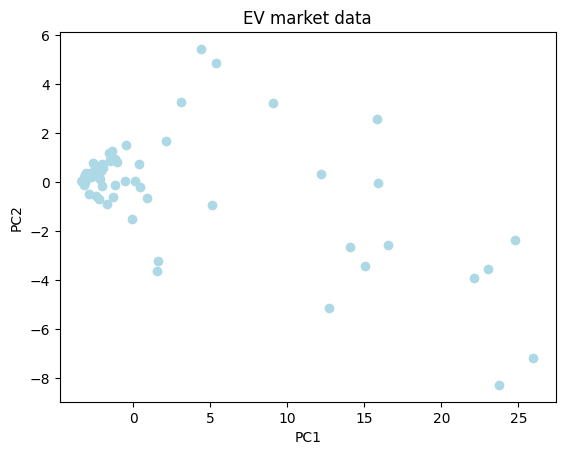

In [ ]:
plt.scatter(scores[:, 0], scores[:, 1], color='lightblue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('EV market data')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.mixture import GaussianMixture
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import pairwise_distances
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [ ]:
kmeans = KMeans(n_clusters=12, init='k-means++', random_state=0).fit(EV_share)
EV_share['cluster_num'] = kmeans.labels_
print(kmeans.labels_)
print(kmeans.inertia_)

[ 0  7  0  0  0  0  0  0  0  0  0  9  0  0  0  0  1  0  0  0  7  9  0 10
  0  7  2  0  8  0  7  6  0  5  0  0  0  0  0  0  0  1  0  0  0  0 11  0
  0  0  0  3  0  0  0  7  7  0  7  0  7  7  0  0  0  0  1  0  0  0  7  7
  0  5  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  7  0  0  0  0  3  0  0  0  0  1  0  0  0  0  1  0  0  0  0  5  0  0  0
  0  1  0  0  0  0  9  0  7  0  0  2  0  0  0  0  1  0  0  0]
13.784402998038505


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
print(EV_share)

     2020-01-01 00:00:00  2020-02-01 00:00:00  2020-03-01 00:00:00  \
0               0.000881             0.000673             0.000997   
1               0.010840             0.011691             0.007271   
2               0.000126             0.000000             0.000311   
3               0.000000             0.000000             0.000000   
4               0.000000             0.000320             0.000000   
..                   ...                  ...                  ...   
135             0.000203             0.000075             0.000085   
136             0.462582             0.506157             0.467733   
137             0.000259             0.000396             0.001869   
138             0.000000             0.000000             0.000000   
139             0.000000             0.000000             0.000000   

     2020-04-01 00:00:00  2020-05-01 00:00:00  2020-06-01 00:00:00  \
0               0.000673             0.000000             0.000866   
1               0.2

In [ ]:
EV_share['sums'] = EV_share.iloc[:, :-1].sum(axis=1)
print(EV_share['sums'])

0       1.508744
1       2.908243
2       1.457263
3       0.814290
4       0.609466
         ...    
135     0.296684
136    21.052692
137     0.483017
138     0.088550
139     0.035784
Name: sums, Length: 140, dtype: float64


In [ ]:
cluster_sums_mean = EV_share.groupby('cluster_num')['sums'].mean()

print(cluster_sums_mean)

cluster_num
0      0.347128
1     23.104443
2     36.495928
3     12.706248
4     11.458640
5      5.195151
6      8.127796
7      3.420270
8     11.009431
9     34.316266
10     4.301430
11     6.514599
Name: sums, dtype: float64


In [ ]:
cluster_counts = EV_share.groupby('cluster_num')['sums'].count()
print(cluster_counts)

cluster_num
0     105
1       7
2       2
3       2
4       1
5       3
6       1
7      13
8       1
9       3
10      1
11      1
Name: sums, dtype: int64
